# BUSINESS CASE:

### No-Churn Telecom is an established Telecom operator in Europe with more than a decade in Business.Due to new players in the market ,telecom industry has become very competative and retaining customers becoming a challenge

### In spite of No_Churn intiatives of reducing tariffs and promoting more offers ,the churn rate( percentage of customers migrating to competitors) is well above 10%

### No-Churn wants to explore possibility of machine learning to help with following use cases to retain competitive edge in the industry

In [1]:
import os
import mysql.connector
import pandas as pd
import numpy as np

In [2]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user ='dm_team3',
                                  password= 'DM!$!Team!27@9!20&')
print(connection)

In [3]:
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_telecom',)


In [4]:
connection=mysql.connector.connect(host = '18.136.157.135',
                                  user ='dm_team3',
                                  password= 'DM!$!Team!27@9!20&',
                                  database='project_telecom')

In [5]:
connection

In [6]:
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_telecom
0        telecom_churn_data


In [7]:
sql = 'select * from telecom_churn_data'

In [8]:
from sqlalchemy import create_engine

In [9]:
df = pd.read_sql(sql,connection)

In [10]:
df.head()

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [11]:
df.columns=['State', 'Acc_len', 'Area_code', 'Phone', 'Int_plan', 'Vmail_plan',
       'Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls', 'Churn']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State           4617 non-null   object
 1   Acc_len         4617 non-null   object
 2   Area_code       4617 non-null   object
 3   Phone           4617 non-null   object
 4   Int_plan        4617 non-null   object
 5   Vmail_plan      4617 non-null   object
 6   Vmail_message   4617 non-null   object
 7   Day_min         4617 non-null   object
 8   Day_calls       4617 non-null   object
 9   Day_charge      4617 non-null   object
 10  Eve_mins        4617 non-null   object
 11  Eve_calls       4617 non-null   object
 12  Eve_charge      4617 non-null   object
 13  Night_mins      4617 non-null   object
 14  Night_calls     4617 non-null   object
 15  Night_charge    4617 non-null   object
 16  Int_mins        4617 non-null   object
 17  Int_calls       4617 non-null   object
 18  Int_char

In [13]:
df.head()

,State,Acc_len,Area_code,Phone,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
df.isnull().sum()

State             0
Acc_len           0
Area_code         0
Phone             0
Int_plan          0
Vmail_plan        0
Vmail_message     0
Day_min           0
Day_calls         0
Day_charge        0
Eve_mins          0
Eve_calls         0
Eve_charge        0
Night_mins        0
Night_calls       0
Night_charge      0
Int_mins          0
Int_calls         0
Int_charge        0
Custserv_calls    0
Churn             0
dtype: int64

In [15]:
df.columns

Index(['State', 'Acc_len', 'Area_code', 'Phone', 'Int_plan', 'Vmail_plan',
       'Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls', 'Churn'],
      dtype='object')

In [16]:
#creating a list except the elements which are catergorical[state,Int_plan,Phone,Vmail_plan,Churn]
list = ['Acc_len', 'Area_code','Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls']

#ff['Acc_len']= pd.to_numeric(ff.Acc_len,errors='coerce')

df[list]= df[list].apply(pd.to_numeric,errors='coerce')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           4617 non-null   object 
 1   Acc_len         4617 non-null   int64  
 2   Area_code       4617 non-null   int64  
 3   Phone           4617 non-null   object 
 4   Int_plan        4617 non-null   object 
 5   Vmail_plan      4617 non-null   object 
 6   Vmail_message   4617 non-null   int64  
 7   Day_min         4617 non-null   float64
 8   Day_calls       4617 non-null   int64  
 9   Day_charge      4617 non-null   float64
 10  Eve_mins        4617 non-null   float64
 11  Eve_calls       4617 non-null   int64  
 12  Eve_charge      4617 non-null   float64
 13  Night_mins      4617 non-null   float64
 14  Night_calls     4617 non-null   int64  
 15  Night_charge    4617 non-null   float64
 16  Int_mins        4617 non-null   float64
 17  Int_calls       4617 non-null   i

In [18]:
df.head()

,State,Acc_len,Area_code,Phone,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,...,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
#dropping phone field -not required since it is unique
df.drop(columns='Phone',inplace=True)
print(df.shape)

(4617, 20)


In [20]:
df_bfre_enc= df.to_csv('df_bfre_enc.csv',index=False)

In [21]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [22]:
from sklearn.preprocessing import LabelEncoder

list1=['Int_plan','Vmail_plan','Churn']
encoder = LabelEncoder()
for i in list1:
    df[i]=encoder.fit_transform(df[i])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           4617 non-null   object 
 1   Acc_len         4617 non-null   int64  
 2   Area_code       4617 non-null   int64  
 3   Int_plan        4617 non-null   int32  
 4   Vmail_plan      4617 non-null   int32  
 5   Vmail_message   4617 non-null   int64  
 6   Day_min         4617 non-null   float64
 7   Day_calls       4617 non-null   int64  
 8   Day_charge      4617 non-null   float64
 9   Eve_mins        4617 non-null   float64
 10  Eve_calls       4617 non-null   int64  
 11  Eve_charge      4617 non-null   float64
 12  Night_mins      4617 non-null   float64
 13  Night_calls     4617 non-null   int64  
 14  Night_charge    4617 non-null   float64
 15  Int_mins        4617 non-null   float64
 16  Int_calls       4617 non-null   int64  
 17  Int_charge      4617 non-null   f

In [24]:
df.head()
df_after_enc=df.to_csv('df_after_enc.csv',index=False)

In [25]:
df.State.value_counts()

WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: State, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df.Int_plan=label_encoder.fit_transform(df.Int_plan)
df.Vmail_plan=label_encoder.fit_transform(df.Vmail_plan)
df.Churn=label_encoder.fit_transform(df.Churn)
df.State=label_encoder.fit_transform(df.State)

In [27]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [28]:
cleaned = df.to_csv('cleaned_dataset.csv',index=False)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           4617 non-null   int32  
 1   Acc_len         4617 non-null   int64  
 2   Area_code       4617 non-null   int64  
 3   Int_plan        4617 non-null   int64  
 4   Vmail_plan      4617 non-null   int64  
 5   Vmail_message   4617 non-null   int64  
 6   Day_min         4617 non-null   float64
 7   Day_calls       4617 non-null   int64  
 8   Day_charge      4617 non-null   float64
 9   Eve_mins        4617 non-null   float64
 10  Eve_calls       4617 non-null   int64  
 11  Eve_charge      4617 non-null   float64
 12  Night_mins      4617 non-null   float64
 13  Night_calls     4617 non-null   int64  
 14  Night_charge    4617 non-null   float64
 15  Int_mins        4617 non-null   float64
 16  Int_calls       4617 non-null   int64  
 17  Int_charge      4617 non-null   f

In [30]:
df=pd.read_csv('cleaned_dataset.csv')

In [31]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#### Do churners call customer service more?

In [32]:
#taking a part of the dataframe and analysing
ff=df.loc[:,['Custserv_calls','Vmail_message','Int_plan','Churn']]
#using groupby()
#df.groupby(['Churn']).mean()
ff.head()

,Custserv_calls,Vmail_message,Int_plan,Churn
0,1,25,0,0
1,1,26,0,0
2,0,0,0,0
3,2,0,1,0
4,3,0,1,0


In [33]:
ff.groupby(['Churn']).std()

,Custserv_calls,Vmail_message,Int_plan
Churn,,,
0,1.163901,13.848080,0.247683
1,1.822432,11.418575,0.451058


In [34]:
ff.groupby(['Churn']).mean()

,Custserv_calls,Vmail_message,Int_plan
Churn,,,
0,1.455693,8.385761,0.065640
1,2.239329,4.614329,0.283537


In [35]:
gg=pd.read_csv('df_after_enc.csv')
gg.groupby('Area_code')['Churn'].value_counts()

Area_code  Churn
408        0         996
           1         165
415        0        1981
           1         318
510        0         984
           1         173
Name: Churn, dtype: int64

# EDA with Visualization

In [36]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [37]:
from scipy import stats

In [38]:
list=['Acc_len', 'Area_code','Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls']
for i in list:
    print('skewness and Kurtosis for '+ str(i)+': '+str(stats.skew(df[i]))+' and '+ str(stats.kurtosis(df[i])))

skewness and Kurtosis for Acc_len: 0.10621316744599318 and -0.0937513108437864
skewness and Kurtosis for Area_code: 1.134964594925911 and -0.6865952826512816
skewness and Kurtosis for Vmail_message: 1.3263030509972922 and 0.12209308548663644
skewness and Kurtosis for Day_min: -0.002947284016695239 and -0.04365222612737929
skewness and Kurtosis for Day_calls: -0.08098712687907403 and 0.19463514964618556
skewness and Kurtosis for Day_charge: -0.0029508087758798626 and -0.04351742102672107
skewness and Kurtosis for Eve_mins: -0.0052781500846280525 and 0.042283656150823745
skewness and Kurtosis for Eve_calls: -0.01754836130740179 and 0.13453389767071755
skewness and Kurtosis for Eve_charge: -0.005250110884106289 and 0.042175304917122514
skewness and Kurtosis for Night_mins: 0.02050841390755843 and 0.06004343141054003
skewness and Kurtosis for Night_calls: 0.03087626932619969 and 0.06744148412465867
skewness and Kurtosis for Night_charge: 0.020500316821170136 and 0.06001463464630463
skewnes

In [39]:
import seaborn as sns

C:\Users\sajid\.conda\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

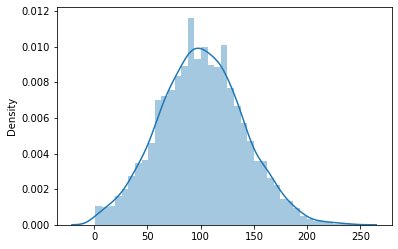

In [40]:
sns.distplot([df.Acc_len])

C:\Users\sajid\.conda\envs\machinelearning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

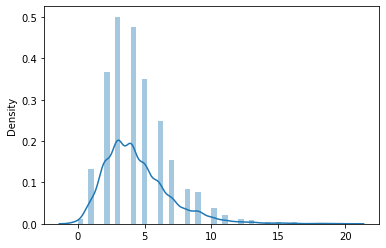

In [41]:
sns.distplot([df.Int_calls])

In [42]:
import scipy.stats as stats
print(stats.norm.cdf(3))

0.9986501019683699


<AxesSubplot:xlabel='State', ylabel='Churn'>

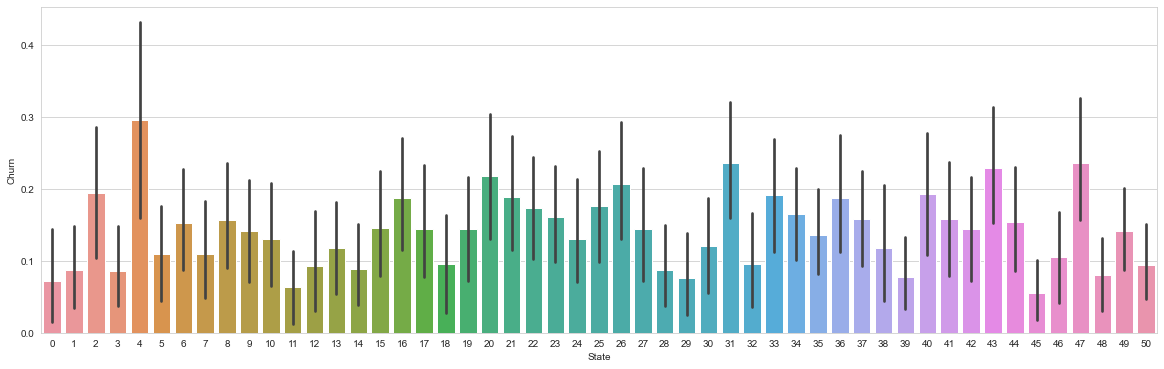

In [168]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Custserv_calls'>

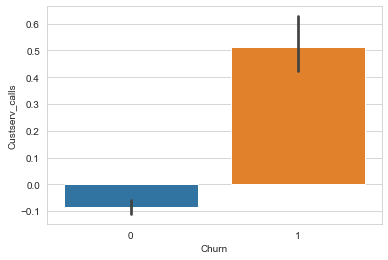

In [171]:
sns.barplot(x='Churn',y='Custserv_calls', data=df)

<AxesSubplot:xlabel='Churn', ylabel='Int_calls'>

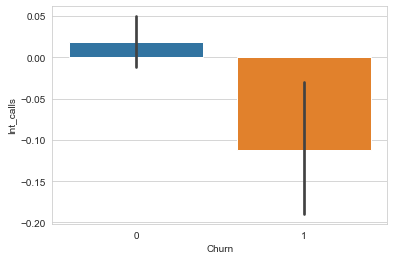

In [191]:
sns.barplot(x='Churn',y='Int_calls',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Int_mins'>

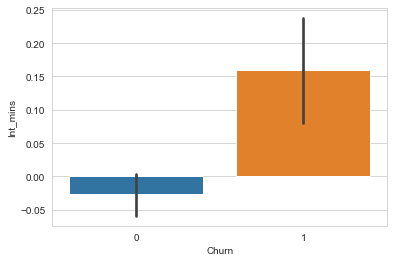

In [194]:
sns.barplot(x='Churn',y='Int_mins',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Int_charge'>

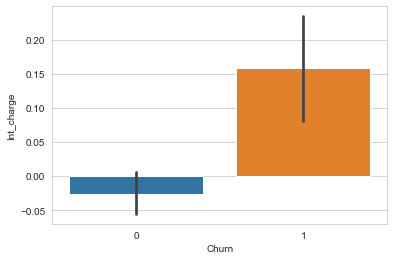

In [207]:
sns.barplot(x='Churn',y='Int_charge',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Day_charge'>

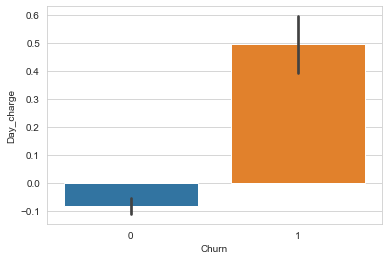

In [197]:
sns.barplot(x='Churn',y='Day_charge',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Day_calls'>

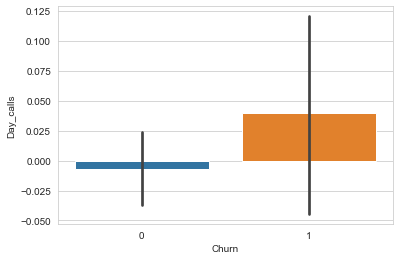

In [198]:
sns.barplot(x='Churn',y='Day_calls',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Day_min'>

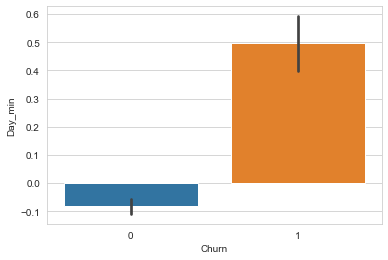

In [199]:
sns.barplot(x='Churn',y='Day_min',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Eve_charge'>

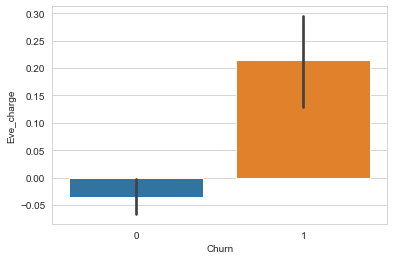

In [200]:
sns.barplot(x='Churn',y='Eve_charge',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Eve_mins'>

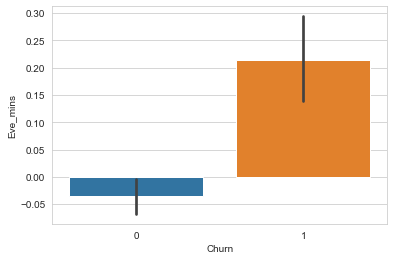

In [202]:
sns.barplot(x='Churn',y='Eve_mins',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Eve_calls'>

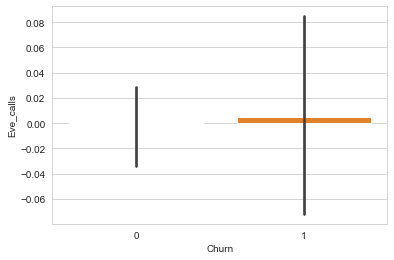

In [203]:
sns.barplot(x='Churn',y='Eve_calls',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Night_charge'>

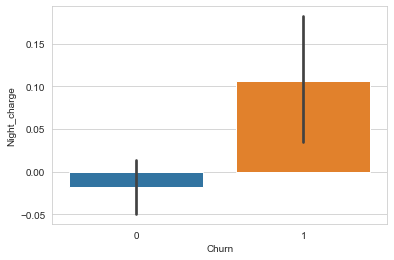

In [204]:
sns.barplot(x='Churn',y='Night_charge',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Night_calls'>

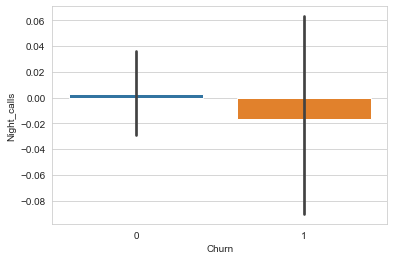

In [205]:
sns.barplot(x='Churn',y='Night_calls',data=df)

<AxesSubplot:xlabel='Churn', ylabel='Night_mins'>

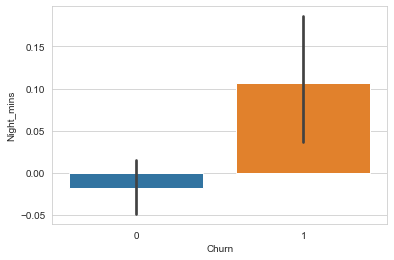

In [206]:
sns.barplot(x='Churn',y='Night_mins',data=df)

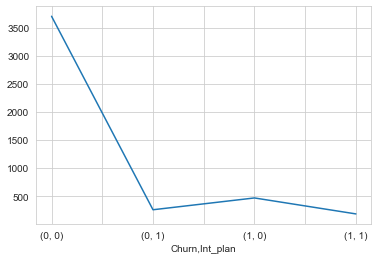

In [209]:
df.int_plan = df.groupby(['Churn','Int_plan']).size()
df.plot()
plt.show()

### Checking Acc_len for churners and non-churners

<AxesSubplot:xlabel='Churn', ylabel='Acc_len'>

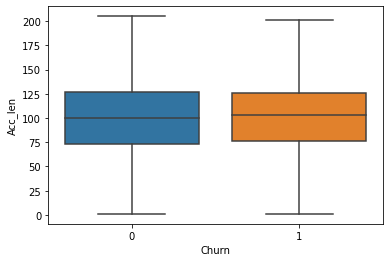

In [43]:
#comparing the results there is not much difference
sns.boxplot(x='Churn',y='Acc_len',data=df,sym="")

<AxesSubplot:xlabel='Churn', ylabel='Acc_len'>

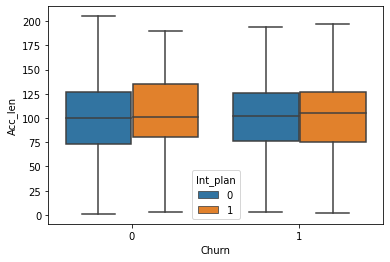

In [44]:
sns.boxplot(x='Churn',y='Acc_len',data=df,sym="",hue='Int_plan')

## Comparing churn with customer service calls and also with international plan

<AxesSubplot:xlabel='Churn', ylabel='Custserv_calls'>

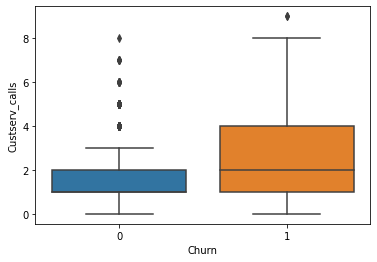

In [45]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df)

In [ ]:
#we can see that churners call customer service more
# checking with international plan now

<AxesSubplot:xlabel='Churn', ylabel='Custserv_calls'>

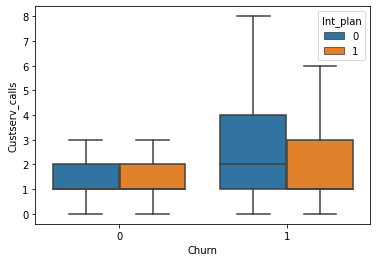

In [46]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df,hue='Int_plan',sym="")

## conclusion: Customer who churn call customer service more unless they have opted for international plan they do lesser number of calls


## Comparing churn with customer service calls and voice mail plans

<AxesSubplot:xlabel='Churn', ylabel='Custserv_calls'>

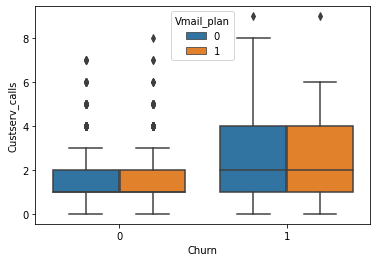

In [47]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df,hue='Vmail_plan')

# compariong churn with customer service calls and area code

<AxesSubplot:xlabel='Churn', ylabel='Custserv_calls'>

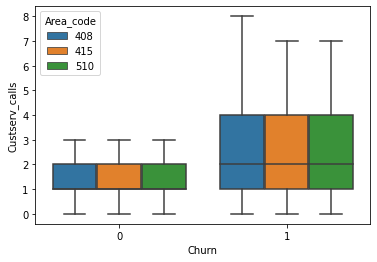

In [48]:
sns.boxplot(x='Churn',y='Custserv_calls',data=df,hue='Area_code',sym="")

In [49]:
df.columns

Index(['State', 'Acc_len', 'Area_code', 'Int_plan', 'Vmail_plan',
       'Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls', 'Churn'],
      dtype='object')

# comparing churn with minutes

<AxesSubplot:xlabel='Churn', ylabel='Day_min'>

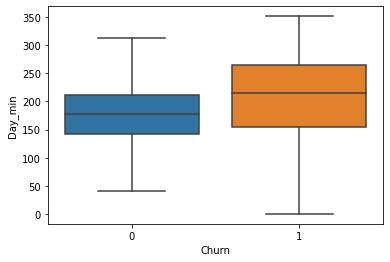

In [50]:
sns.boxplot(x='Churn',y='Day_min',data=df,sym="")

<AxesSubplot:xlabel='Churn', ylabel='Eve_mins'>

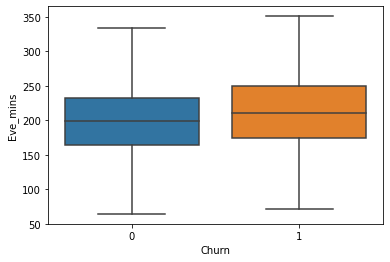

In [51]:
sns.boxplot(x='Churn',y='Eve_mins',data=df,sym="")

<AxesSubplot:xlabel='Churn', ylabel='Night_mins'>

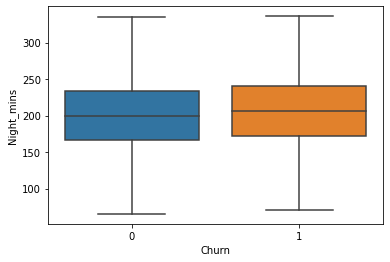

In [52]:
sns.boxplot(x='Churn',y='Night_mins',data=df,sym="")

## Featurte Selection

In [175]:
df.corr()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
State,1.000000,0.008638,0.015370,0.009789,-0.033323,-0.028491,0.009172,-0.008418,0.009173,0.002927,-0.010696,0.002920,0.014747,-0.002134,0.014735,-0.017423,0.012466,-0.017464,-0.016943,0.010979
Acc_len,0.008638,1.000000,-0.020394,0.013948,-0.004602,-0.012983,0.002002,0.032783,0.001999,-0.006778,0.015598,-0.006775,-0.002077,-0.009482,-0.002095,0.003483,0.023485,0.003501,0.002620,0.018046
Area_code,0.015370,-0.020394,1.000000,0.039263,-0.003150,-0.002597,-0.018900,-0.013179,-0.018903,0.011513,-0.011528,0.011533,0.002794,0.015316,0.002782,-0.007292,-0.011531,-0.007386,0.021046,0.011995
Int_plan,0.009789,0.013948,0.039263,1.000000,0.009278,0.011596,0.028220,0.007477,0.028223,0.023740,0.003360,0.023740,-0.025951,0.007390,-0.025959,0.036973,0.006717,0.036955,-0.012846,0.257524
Vmail_plan,-0.033323,-0.004602,-0.003150,0.009278,1.000000,0.955280,0.004444,-0.005738,0.004441,0.021775,-0.005534,0.021779,0.006431,0.008468,0.006426,0.005872,-0.000043,0.005912,-0.014544,-0.110149
Vmail_message,-0.028491,-0.012983,-0.002597,0.011596,0.955280,1.000000,0.009028,-0.003846,0.009025,0.017872,-0.006508,0.017878,0.004672,0.000889,0.004665,0.005167,0.007423,0.005202,-0.006951,-0.096884
Day_min,0.009172,0.002002,-0.018900,0.028220,0.004444,0.009028,1.000000,-0.002823,1.000000,-0.010260,0.012990,-0.010268,0.009604,0.005165,0.009591,-0.012314,0.000166,-0.012261,-0.008149,0.202439
Day_calls,-0.008418,0.032783,-0.013179,0.007477,-0.005738,-0.003846,-0.002823,1.000000,-0.002821,-0.006430,0.003923,-0.006429,0.010730,-0.013299,0.010724,0.012951,0.010889,0.013055,-0.008747,0.016268
Day_charge,0.009173,0.001999,-0.018903,0.028223,0.004441,0.009025,1.000000,-0.002821,1.000000,-0.010255,0.012992,-0.010262,0.009606,0.005164,0.009593,-0.012315,0.000163,-0.012262,-0.008155,0.202434
Eve_mins,0.002927,-0.006778,0.011513,0.023740,0.021775,0.017872,-0.010260,-0.006430,-0.010255,1.000000,0.001135,1.000000,-0.018830,0.014226,-0.018837,0.000165,0.005749,0.000172,-0.015598,0.087042


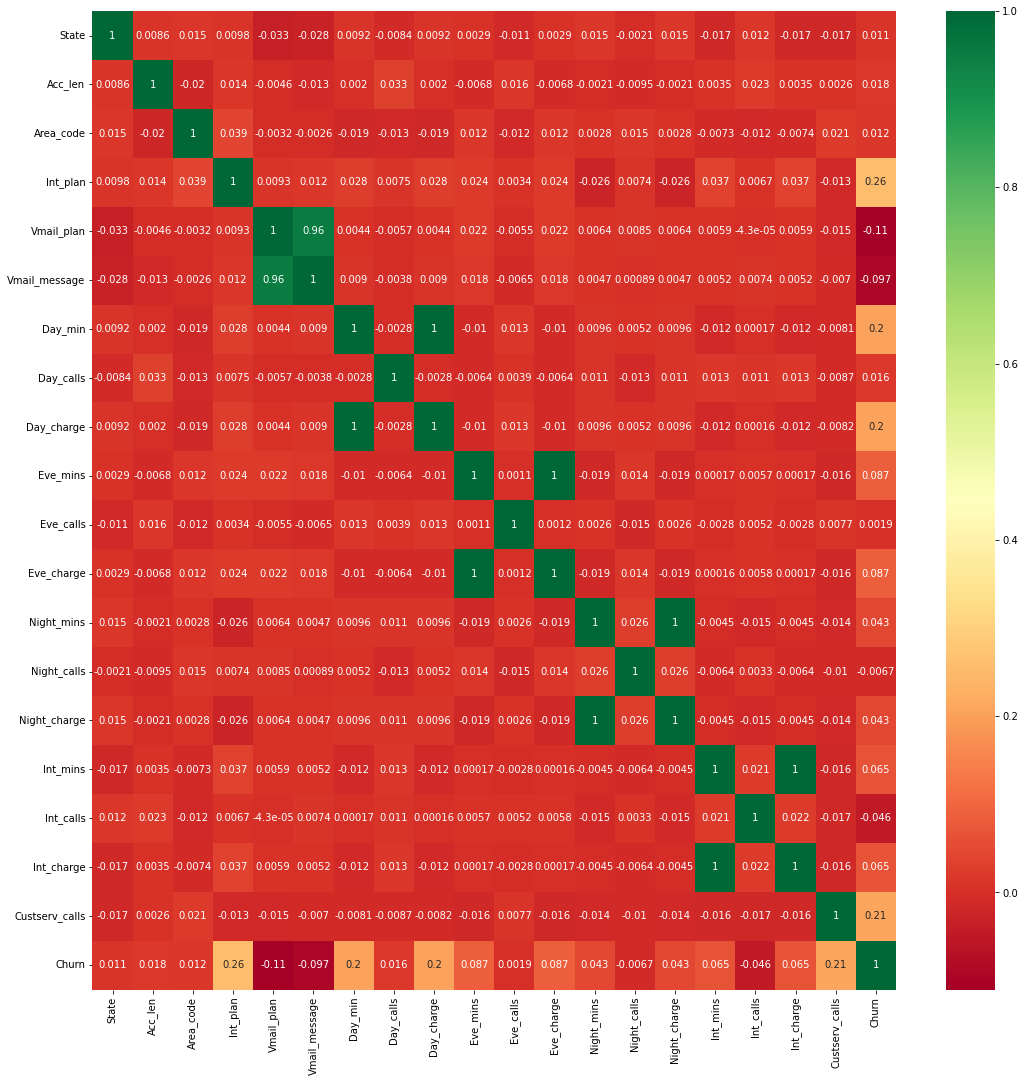

In [142]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [53]:
ff = pd.read_csv('cleaned_dataset.csv')

In [54]:
ff.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [55]:
ff.describe()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,26.041585,100.645224,437.046350,0.096600,0.267706,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035,0.142084
std,14.790361,39.597194,42.288212,0.295444,0.442812,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019,0.349174
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000,0.000000
50%,26.000000,100.000000,415.000000,0.000000,0.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.000000,127.000000,510.000000,0.000000,1.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,510.000000,1.000000,1.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [56]:
from sklearn.preprocessing import StandardScaler

In [57]:
#scaling on the quantitative data
list=['Acc_len','Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
       'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls']

#list=['State','Acc_len', 'Area_code','Int_plan','Vmail_plan','Vmail_message', 'Day_min', 'Day_calls', 'Day_charge', 'Eve_mins',
      # 'Eve_calls', 'Eve_charge', 'Night_mins', 'Night_calls', 'Night_charge',
       #'Int_mins', 'Int_calls', 'Int_charge', 'Custserv_calls']
        
ff[list] = StandardScaler().fit_transform(ff[list])

In [58]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           4617 non-null   int64  
 1   Acc_len         4617 non-null   float64
 2   Area_code       4617 non-null   int64  
 3   Int_plan        4617 non-null   int64  
 4   Vmail_plan      4617 non-null   int64  
 5   Vmail_message   4617 non-null   float64
 6   Day_min         4617 non-null   float64
 7   Day_calls       4617 non-null   float64
 8   Day_charge      4617 non-null   float64
 9   Eve_mins        4617 non-null   float64
 10  Eve_calls       4617 non-null   float64
 11  Eve_charge      4617 non-null   float64
 12  Night_mins      4617 non-null   float64
 13  Night_calls     4617 non-null   float64
 14  Night_charge    4617 non-null   float64
 15  Int_mins        4617 non-null   float64
 16  Int_calls       4617 non-null   float64
 17  Int_charge      4617 non-null   f

In [59]:
ff.Churn=ff.Churn.astype('int64')

In [60]:
ff.describe()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls,Churn
count,4617.000000,4.617000e+03,4617.000000,4617.000000,4617.000000,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4.617000e+03,4617.000000
mean,26.041585,-1.077279e-16,437.046350,0.096600,0.267706,1.538971e-17,2.639335e-16,-1.477412e-16,-2.539302e-17,-2.385404e-16,-9.926361e-17,4.778504e-16,3.129882e-16,2.954824e-16,-3.241457e-16,-1.600529e-16,6.155882e-18,-2.939434e-16,5.232500e-17,0.142084
std,14.790361,1.000108e+00,42.288212,0.295444,0.442812,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,0.349174
min,0.000000,-2.516744e+00,408.000000,0.000000,0.000000,-5.775869e-01,-3.342995e+00,-5.032694e+00,-3.343076e+00,-3.964847e+00,-5.054691e+00,-3.964913e+00,-3.510694e+00,-4.412010e+00,-3.512462e+00,-3.728350e+00,-1.804315e+00,-3.729418e+00,-1.199068e+00,0.000000
25%,13.000000,-6.729798e-01,408.000000,0.000000,0.000000,-5.775869e-01,-6.807840e-01,-6.566293e-01,-6.807402e-01,-6.830474e-01,-6.650012e-01,-6.834523e-01,-6.633393e-01,-6.493849e-01,-6.631596e-01,-6.090880e-01,-5.834873e-01,-6.125301e-01,-4.338854e-01,0.000000
50%,26.000000,-1.629646e-02,415.000000,0.000000,0.000000,-5.775869e-01,-8.284011e-03,-2.734503e-03,-8.345078e-03,7.337303e-03,4.138567e-02,7.749021e-03,3.483838e-03,2.803428e-03,5.195153e-03,7.510198e-03,-1.765446e-01,5.473462e-03,-4.338854e-01,0.000000
75%,39.000000,6.656439e-01,510.000000,0.000000,1.000000,6.732537e-01,6.734791e-01,6.511603e-01,6.738581e-01,6.640930e-01,6.973164e-01,6.640411e-01,6.782217e-01,6.549917e-01,6.779470e-01,6.603789e-01,6.373409e-01,6.637816e-01,3.312975e-01,0.000000
max,50.000000,3.595462e+00,510.000000,1.000000,1.000000,3.174935e+00,3.168954e+00,3.266739e+00,3.169458e+00,3.229792e+00,3.522864e+00,3.228700e+00,3.846126e+00,3.765428e+00,3.843838e+00,3.525747e+00,6.334539e+00,3.525407e+00,5.687578e+00,1.000000


In [61]:
data_corr=ff.corr()

In [62]:
data_corr.Churn.sort_values()

Vmail_plan       -0.110149
Vmail_message    -0.096884
Int_calls        -0.045844
Night_calls      -0.006671
Eve_calls         0.001943
State             0.010979
Area_code         0.011995
Day_calls         0.016268
Acc_len           0.018046
Night_charge      0.043260
Night_mins        0.043262
Int_charge        0.064728
Int_mins          0.064731
Eve_charge        0.087036
Eve_mins          0.087042
Day_charge        0.202434
Day_min           0.202439
Custserv_calls    0.209351
Int_plan          0.257524
Churn             1.000000
Name: Churn, dtype: float64

In [63]:
df_after_scale = ff.to_csv('df_after_scale.csv',index=False)

## conclusion we can see that day mins-day charge / eve_mins-eve charge / night mins -night charge/ Int mins and Int charge are highly correlated

In [64]:
df = ff.drop(['Day_charge','Eve_charge','Night_charge','Int_charge'],axis=1)

In [65]:
df.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Eve_mins,Eve_calls,Night_mins,Night_calls,Int_mins,Int_calls,Custserv_calls,Churn
0,16,0.690901,415,0,1,1.261885,1.568293,0.500261,-0.059921,-0.059527,0.872135,-0.448712,-0.101301,-0.583487,-0.433885,0
1,35,0.160503,415,0,1,1.335463,-0.349166,1.154156,-0.097506,0.142298,1.064069,0.153308,1.240707,-0.583487,-0.433885,0
2,31,0.918214,415,0,0,-0.577587,1.166275,0.701460,-1.567294,0.495492,-0.752381,0.203477,0.696649,0.230398,-1.199068,0
3,35,-0.420409,408,1,0,-0.577587,2.203741,-1.461423,-2.740354,-0.614545,-0.073686,-0.549048,-1.334498,1.044284,0.331298,0
4,36,-0.647723,415,1,0,-0.577587,-0.254682,0.651160,-1.031207,1.100966,-0.271556,1.056338,-0.065031,-0.583487,1.096480,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           4617 non-null   int64  
 1   Acc_len         4617 non-null   float64
 2   Area_code       4617 non-null   int64  
 3   Int_plan        4617 non-null   int64  
 4   Vmail_plan      4617 non-null   int64  
 5   Vmail_message   4617 non-null   float64
 6   Day_min         4617 non-null   float64
 7   Day_calls       4617 non-null   float64
 8   Eve_mins        4617 non-null   float64
 9   Eve_calls       4617 non-null   float64
 10  Night_mins      4617 non-null   float64
 11  Night_calls     4617 non-null   float64
 12  Int_mins        4617 non-null   float64
 13  Int_calls       4617 non-null   float64
 14  Custserv_calls  4617 non-null   float64
 15  Churn           4617 non-null   int64  
dtypes: float64(11), int64(5)
memory usage: 577.2 KB


In [67]:
df=df.to_csv('df_scale_corr.csv',index=False)

## since the output variable is Goal- churn or no churn TRIAL AND ERROR between logistic regression ,SVM ,Randomforest

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score

In [69]:
df= pd.read_csv('df_after_scale.csv')

In [70]:
X = df.drop('Churn',axis=1)

In [71]:
X.head()

,State,Acc_len,Area_code,Int_plan,Vmail_plan,Vmail_message,Day_min,Day_calls,Day_charge,Eve_mins,Eve_calls,Eve_charge,Night_mins,Night_calls,Night_charge,Int_mins,Int_calls,Int_charge,Custserv_calls
0,16,0.690901,415,0,1,1.261885,1.568293,0.500261,1.568569,-0.059921,-0.059527,-0.059742,0.872135,-0.448712,0.871418,-0.101301,-0.583487,-0.102005,-0.433885
1,35,0.160503,415,0,1,1.335463,-0.349166,1.154156,-0.349447,-0.097506,0.142298,-0.096978,1.064069,0.153308,1.064889,1.240707,-0.583487,1.241481,-0.433885
2,31,0.918214,415,0,0,-0.577587,1.166275,0.701460,1.166439,-1.567294,0.495492,-1.567818,-0.752381,0.203477,-0.751101,0.696649,0.230398,0.690651,-1.199068
3,35,-0.420409,408,1,0,-0.577587,2.203741,-1.461423,2.203911,-2.740354,-0.614545,-2.740765,-0.073686,-0.549048,-0.073952,-1.334498,1.044284,-1.338013,0.331298
4,36,-0.647723,415,1,0,-0.577587,-0.254682,0.651160,-0.254636,-1.031207,1.100966,-1.030217,-0.271556,1.056338,-0.271820,-0.065031,-0.583487,-0.061701,1.096480


In [72]:
Y = df.Churn

In [73]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

In [74]:
print(X_train.shape)
print(X_test.shape)

(3231, 19)
(1386, 19)


In [75]:
print(Counter(Y_train))
print(Counter(Y_test))

Counter({0: 2761, 1: 470})
Counter({0: 1200, 1: 186})


In [76]:
smote = SMOTE()

In [80]:
X_train_smote,Y_train_smote = smote.fit_resample(X_train,Y_train)

In [82]:
print(Counter(Y_train))
print(Counter(Y_train_smote))

Counter({0: 2761, 1: 470})
Counter({0: 2761, 1: 2761})


# Logistic Regression

In [84]:
clf = LogisticRegression()
clf.fit(X_train_smote,Y_train_smote)

C:\Users\sajid\.conda\envs\machinelearning\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [85]:
Y_pred=clf.predict(X_test)

In [87]:
accuracy_score(Y_test,Y_pred)

0.7438672438672439

In [88]:
recall_score(Y_test,Y_pred)

0.7311827956989247

In [89]:
precision_score(Y_test,Y_pred)

0.30839002267573695

In [90]:
confusion_matrix(Y_test,Y_pred)

array([[895, 305],
       [ 50, 136]], dtype=int64)

In [91]:
pd.crosstab(Y_test,Y_pred)

col_0,0,1
Churn,,
0,895,305
1,50,136


In [92]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.75      0.83      1200
           1       0.31      0.73      0.43       186

    accuracy                           0.74      1386
   macro avg       0.63      0.74      0.63      1386
weighted avg       0.86      0.74      0.78      1386



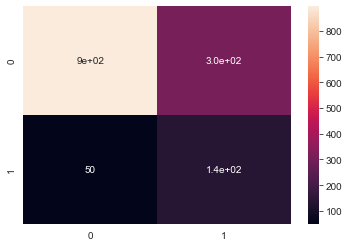

In [216]:
conf = confusion_matrix(Y_test,Y_pred)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

# Random forest

In [93]:
model = RandomForestClassifier(random_state=5,n_estimators=100,max_depth=15)

In [95]:
model.fit(X_train_smote,Y_train_smote)

RandomForestClassifier(max_depth=15, random_state=5)

In [96]:
model.feature_importances_

array([0.02769686, 0.02885335, 0.00768386, 0.03368727, 0.050395  ,
       0.0540417 , 0.09897536, 0.02841393, 0.11803222, 0.04906757,
       0.02534946, 0.04917344, 0.0356827 , 0.02545861, 0.03235453,
       0.03473494, 0.0797391 , 0.03514137, 0.18551875])

In [97]:
Y_pred_rf= model.predict(X_test)

In [98]:
print(classification_report(Y_test,Y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1200
           1       0.71      0.78      0.74       186

    accuracy                           0.93      1386
   macro avg       0.84      0.87      0.85      1386
weighted avg       0.93      0.93      0.93      1386



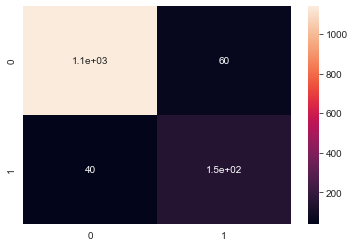

In [217]:
conf = confusion_matrix(Y_test,Y_pred_rf)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [99]:
accuracy_score(Y_test,Y_pred_rf)

0.9278499278499278

In [101]:
pd.crosstab(Y_test,Y_pred_rf)

col_0,0,1
Churn,,
0,1140,60
1,40,146


# Support Vector Machine

In [102]:
svc = SVC()

In [103]:
svc.fit(X_train_smote,Y_train_smote)

SVC()

In [105]:
Y_pred_svc=svc.predict(X_test)

In [106]:
accuracy_score(Y_test,Y_pred_svc)

0.6753246753246753

In [108]:
print(classification_report(Y_test,Y_pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1200
           1       0.14      0.28      0.19       186

    accuracy                           0.68      1386
   macro avg       0.50      0.51      0.49      1386
weighted avg       0.77      0.68      0.72      1386



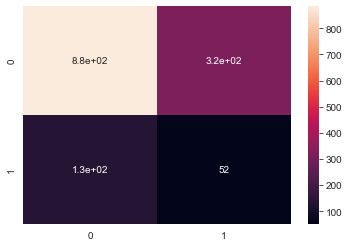

In [218]:
conf = confusion_matrix(Y_test,Y_pred_svc)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

In [109]:
confusion_matrix(Y_test,Y_pred_svc)

array([[884, 316],
       [134,  52]], dtype=int64)

In [110]:
pd.crosstab(Y_test,Y_pred)

col_0,0,1
Churn,,
0,895,305
1,50,136


In [111]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [112]:
params= {'n_estimators':[10,20,50,70,80,100,120],
         'criterion': ['entropy','gini'],
          'max_features':['auto',5,7,10,15],
          'random_state':range(0,10)
          }

In [114]:
model_cv=RandomizedSearchCV(RandomForestClassifier(),params)

In [117]:
model_cv.fit(X_train_smote,Y_train_smote)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 5, 7, 10, 15],
                                        'n_estimators': [10, 20, 50, 70, 80,
                                                         100, 120],
                                        'random_state': range(0, 10)})

In [118]:
model_cv.best_params_

{'random_state': 9,
 'n_estimators': 70,
 'max_features': 15,
 'criterion': 'entropy'}

In [119]:
model_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=15, n_estimators=70,
                       random_state=9)

In [120]:
model_cv.best_score_

0.9458595645616106

In [121]:
Y_pred_grid=model_cv.predict(X_test)
print(classification_report(Y_test,Y_pred_grid))
pd.crosstab(Y_test,Y_pred_grid)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.78      0.79      0.79       186

    accuracy                           0.94      1386
   macro avg       0.87      0.88      0.88      1386
weighted avg       0.94      0.94      0.94      1386



col_0,0,1
Churn,,
0,1159,41
1,39,147


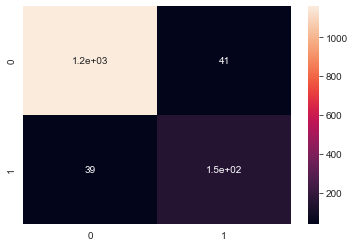

In [219]:
conf = confusion_matrix(Y_test,Y_pred_grid)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)
plt.show()

# ROC CURVE

In [130]:
from sklearn.metrics import roc_curve, roc_auc_score

In [131]:
pd.DataFrame(model.predict_proba(X_test)).iloc[:,1]

0       0.230000
1       0.672544
2       0.274700
3       0.302199
4       0.220170
          ...   
1381    0.110104
1382    0.179993
1383    0.127728
1384    0.578392
1385    0.431254
Name: 1, Length: 1386, dtype: float64

In [132]:
Y_pred_prob=model.predict_proba(X_test)[:,1]
print(Y_pred_prob)

[0.23       0.6725441  0.27469971 ... 0.1277275  0.57839181 0.43125413]


In [133]:
fpr, tpr , thresholds = roc_curve(Y_test,Y_pred_prob)

In [134]:
tpr

array([0.        , 0.00537634, 0.0483871 , 0.05913978, 0.08064516,
       0.09139785, 0.22580645, 0.22580645, 0.32258065, 0.32258065,
       0.34408602, 0.34408602, 0.37096774, 0.37096774, 0.39247312,
       0.39247312, 0.40322581, 0.44623656, 0.44623656, 0.4516129 ,
       0.4516129 , 0.45698925, 0.45698925, 0.5       , 0.5       ,
       0.55913978, 0.55913978, 0.56451613, 0.56451613, 0.58064516,
       0.59139785, 0.62365591, 0.62365591, 0.63978495, 0.63978495,
       0.65053763, 0.65053763, 0.66129032, 0.66129032, 0.67204301,
       0.67204301, 0.70430108, 0.71505376, 0.71505376, 0.72043011,
       0.72043011, 0.72580645, 0.72580645, 0.7311828 , 0.7311828 ,
       0.73655914, 0.73655914, 0.74193548, 0.74193548, 0.74731183,
       0.74731183, 0.75268817, 0.75268817, 0.75806452, 0.75806452,
       0.76344086, 0.76344086, 0.7688172 , 0.7688172 , 0.77419355,
       0.77419355, 0.78494624, 0.78494624, 0.79569892, 0.79569892,
       0.80107527, 0.80107527, 0.80645161, 0.80645161, 0.81182

In [135]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.33333333e-04,
       8.33333333e-04, 2.50000000e-03, 2.50000000e-03, 3.33333333e-03,
       3.33333333e-03, 4.16666667e-03, 4.16666667e-03, 5.00000000e-03,
       5.00000000e-03, 5.00000000e-03, 5.83333333e-03, 5.83333333e-03,
       6.66666667e-03, 6.66666667e-03, 7.50000000e-03, 7.50000000e-03,
       8.33333333e-03, 8.33333333e-03, 1.08333333e-02, 1.08333333e-02,
       1.25000000e-02, 1.25000000e-02, 1.25000000e-02, 1.25000000e-02,
       1.33333333e-02, 1.33333333e-02, 1.50000000e-02, 1.50000000e-02,
       1.66666667e-02, 1.66666667e-02, 1.75000000e-02, 1.75000000e-02,
       1.83333333e-02, 1.83333333e-02, 1.83333333e-02, 1.91666667e-02,
       1.91666667e-02, 2.00000000e-02, 2.00000000e-02, 2.08333333e-02,
       2.08333333e-02, 2.16666667e-02, 2.16666667e-02, 2.33333333e-02,
       2.33333333e-02, 2.41666667e-02, 2.41666667e-02, 3.08333333e-02,
      

In [136]:
thresholds

array([1.99998102, 0.99998102, 0.98980583, 0.98978685, 0.98560822,
       0.97998102, 0.908     , 0.90444311, 0.86364176, 0.8600434 ,
       0.8490101 , 0.84772075, 0.83337834, 0.83067062, 0.82158895,
       0.82090156, 0.82      , 0.80938596, 0.8048639 , 0.80454403,
       0.80215045, 0.8       , 0.79350301, 0.7687451 , 0.76465333,
       0.71371452, 0.69887859, 0.69795068, 0.69055822, 0.68742073,
       0.68      , 0.66881872, 0.66751949, 0.65735705, 0.65466964,
       0.64935312, 0.64665605, 0.63991038, 0.63788889, 0.63428297,
       0.63333596, 0.6265    , 0.62      , 0.61975712, 0.61939315,
       0.61882107, 0.61071429, 0.6091872 , 0.60223919, 0.6       ,
       0.59831304, 0.59590909, 0.59453733, 0.58809858, 0.582     ,
       0.57195882, 0.5674526 , 0.56063392, 0.56      , 0.5599396 ,
       0.55954545, 0.55      , 0.54389349, 0.53586447, 0.53523815,
       0.51886519, 0.516     , 0.49959131, 0.4945098 , 0.48591311,
       0.48205312, 0.47986961, 0.47973102, 0.46818182, 0.46242

In [137]:
import matplotlib.pyplot as plt

In [139]:
auc = roc_auc_score(Y_test, model.predict_proba(X_test)[:,1])
auc

0.9086178315412187

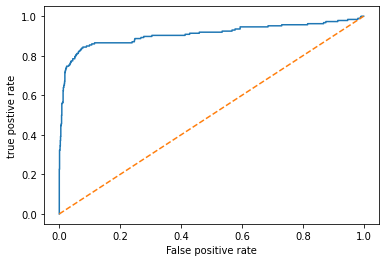

In [140]:
plt.plot(fpr,tpr)
plt.xlabel("False positive rate")
plt.ylabel("true postive rate")
plt.plot([0,1],[0,1],"--")
plt.show()

In [143]:
importances = model.feature_importances_
sort=np.argsort(importances)
label=X.columns[sort]

In [144]:
X.shape
ss = range(X.shape[1])
print(ss)

range(0, 19)


<BarContainer object of 19 artists>

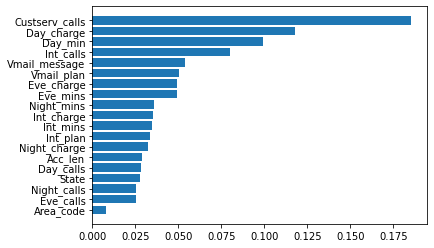

In [146]:
plt.barh(ss,importances[sort],tick_label=label)

In [156]:
 import joblib

In [157]:
joblib.dump(model,'Telecom_trained_model.ml')

['Telecom_trained_model.ml']

In [158]:
model=joblib.load('Telecom_trained_model.ml')

# conclusion:

## Random forest gives best accuracy for all the metrics as compared to  Logistic Regression and support vector machine